# **COMPLETE COFFEE SHOP MANAGEMENT SYSTEM**

**PURPOSE**

This Colab notebook provides a comprehensive analysis of a coffee shop's operations by leveraging data on customers, products, orders, suppliers, and employees. The analysis includes data cleaning, exploratory data analysis, visualization, and valuable insights.

The purpose of this comprehensive coffee shop management system is to empower coffee shop owners and managers with the tools and insights needed to optimize their operations, enhance customer satisfaction, and drive business growth. By leveraging data analytics and visualization techniques, the system aims to provide actionable insights into various aspects of coffee shop management, including customer behavior, product performance, order management, supplier relationships, employee management, and time-series analysis.

In [ ]:
#install the required libraries
from mysql import connector
import pandas as pd


**DATABASE CONNECTION TO mySQL**

In [ ]:
connection =connector.connect(
host='127.0.0.1', #Host of mySql
user='root', #username
password='admin', #password
database='coffeeshop') #databasename

In [ ]:
# Install necessary libraries for connecting to MySQL database
!pip install SQLAlchemy mysql-connector-python


### **Extract the table values**

In [ ]:
# Read the tables into DataFrames
customer = pd.read_sql('SELECT * FROM customer', con=engine)
product = pd.read_sql('SELECT * FROM product', con=engine)
order = pd.read_sql('SELECT * FROM order_details', con=engine)
supplier = pd.read_sql('SELECT * FROM supplier', con=engine)
employee=pd.read_sql('SELECT * FROM employee', con=engine)


# Printing the first 5 records from each table
print("Customer Data:")
print(customer.head())

print("\nProduct Data:")
print(product.head())

print("\nOrder Data:")
print(order.head())

print("\nSupplier Data:")
print(supplier.head())

print("\nemployee Data:")
print(employee.head())


Customer Data:
  customer_id           name         city                      email  \
0        C001  Alice Johnson     New York  alice.johnson@example.com   
1        C002      Bob Smith  Los Angeles      bob.smith@example.com   
2        C003  Charlie Brown      Chicago  charlie.brown@example.com   
3        C004   Diana Prince      Houston   diana.prince@example.com   
4        C005     Evan Davis      Phoenix     evan.davis@example.com   

       phone_no            address  pin_code  
0  123-456-7890     123 Elm Street     10001  
1  234-567-8901   456 Maple Avenue     90001  
2  345-678-9012  789 Oak Boulevard     60601  
3  456-789-0123     101 Pine Drive     77001  
4  567-890-1234     202 Birch Lane     85001  

Product Data:
  product_id product_name   category sub_category  original_price  \
0       P001     Espresso  Beverages       Coffee             2.0   
1       P002        Latte  Beverages       Coffee             2.5   
2       P003   Cappuccino  Beverages       Coffe

## **Data Cleaning**

### Check for missing values in each table

In [ ]:
# Check for missing values in each table
print("Missing values in Customer Data:")
if customer.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(customer.isnull().sum())

print("\nMissing values in Product Data:")
if product.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(product.isnull().sum())

print("\nMissing values in Order Data:")
if order.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(order.isnull().sum())

print("\nMissing values in Supplier Data:")
if supplier.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(supplier.isnull().sum())

print("\nMissing values in Employee Data:")
if employee.isnull().sum().sum() == 0:
    print("No missing values")
else:
    print(employee.isnull().sum())


Missing values in Customer Data:
No missing values

Missing values in Product Data:
No missing values

Missing values in Order Data:
No missing values

Missing values in Supplier Data:
No missing values

Missing values in Employee Data:
No missing values


### Check data types of each column in Customer Data

In [ ]:
# Check data types of each column in Customer Data
print("Data types in Customer Data:")
print(customer.dtypes)

print("Data types in employee Data:")
print(employee.dtypes)

print("Data types in order Data:")
print(order.dtypes)

print("Data types in supplier Data:")
print(supplier.dtypes)

print("Data types in product Data:")
print(product.dtypes)
# Similarly, check and ensure appropriate data types for other tables


Data types in Customer Data:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object
Data types in employee Data:
employee_id     object
name            object
position        object
salary         float64
date_hired      object
dtype: object
Data types in order Data:
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object
Data types in supplier Data:
supplier_id       object
name              object
contact_person    object
phone_no          object
address           object
dtype: object
Data types in product Data:
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock

## **Exploratory Data Analysis (EDA) and Visualization:**

### **Total Number of Products by Category**

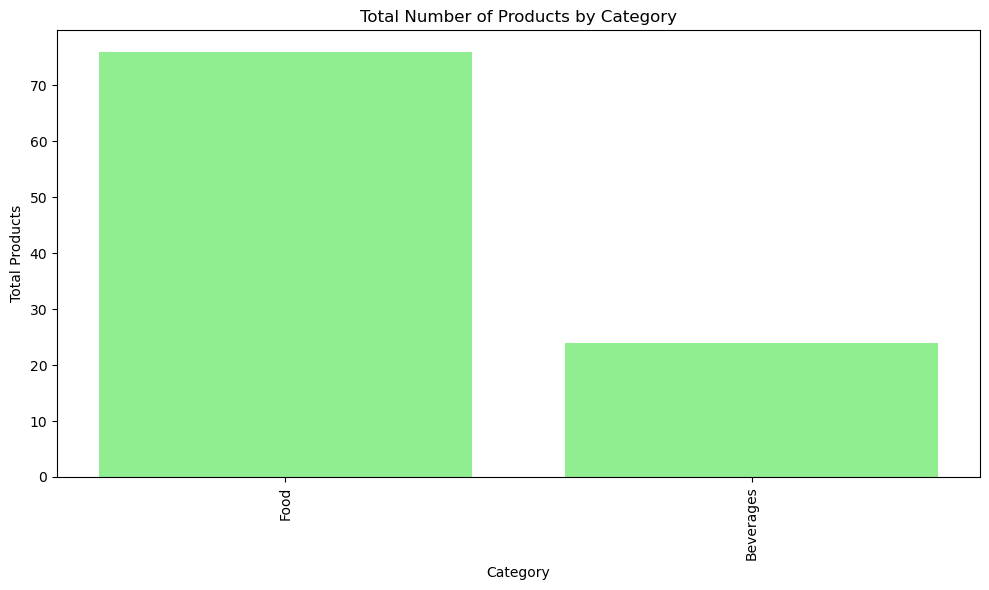

In [ ]:
import matplotlib.pyplot as plt

# Grouping products by category and counting the number of products in each category
product_count_by_category = product.groupby('category')['product_id'].count().reset_index()

# Renaming columns for clarity
product_count_by_category.columns = ['Category', 'Total Products']

# Sorting categories by total products in descending order
product_count_by_category = product_count_by_category.sort_values(by='Total Products', ascending=False)

# Plotting a bar chart for total number of products by category
plt.figure(figsize=(10, 6))
plt.bar(product_count_by_category['Category'], product_count_by_category['Total Products'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Total Products')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### **Distribution of Products Across Sub-Categories**

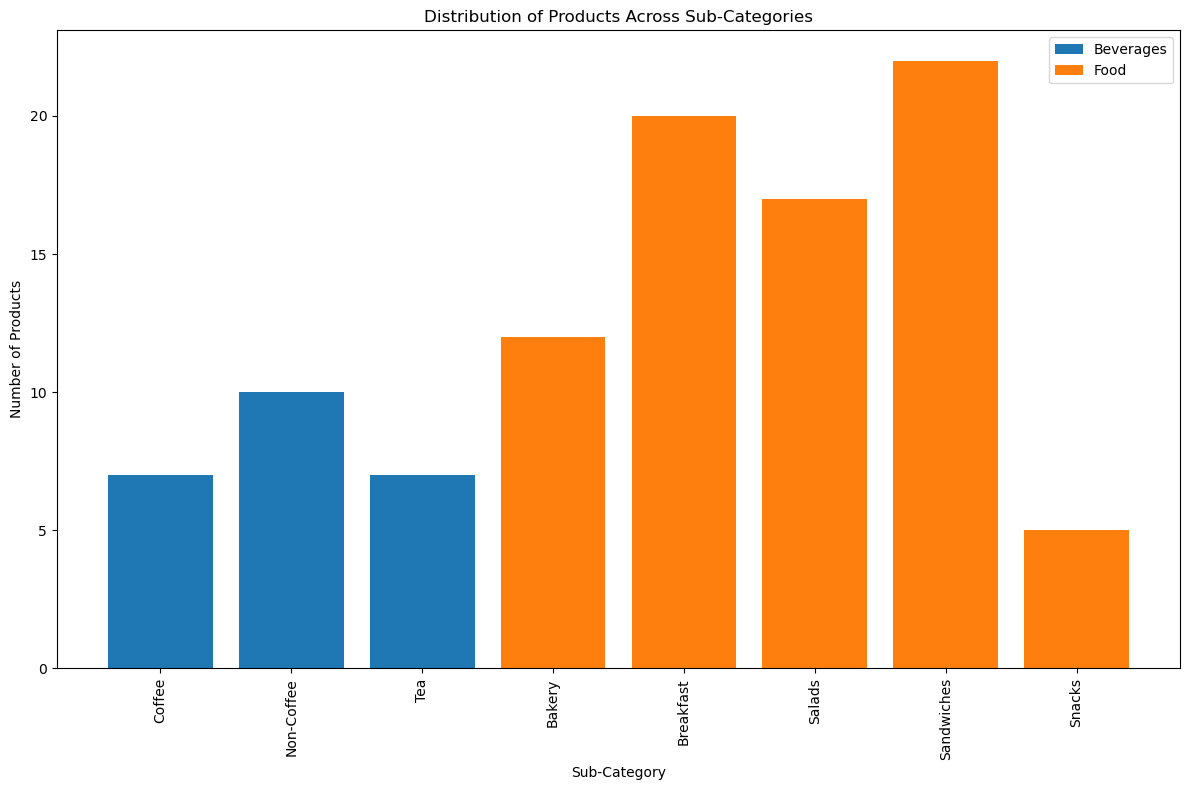

In [ ]:
import matplotlib.pyplot as plt

# Grouping products by both category and sub-category and counting the number of products in each sub-category
product_distribution = product.groupby(['category', 'sub_category'])['product_id'].count().reset_index()

# Plotting the distribution of products across sub-categories
plt.figure(figsize=(12, 8))
for category in product_distribution['category'].unique():
    data = product_distribution[product_distribution['category'] == category]
    plt.bar(data['sub_category'], data['product_id'], label=category)

plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Sub-Categories')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the average selling price
average_selling_price = product['selling_price'].mean()

# Calculate the maximum selling price
max_selling_price = product['selling_price'].max()

# Calculate the minimum selling price
min_selling_price = product['selling_price'].min()

# Print the results
print("Average Selling Price:", average_selling_price)
print("Maximum Selling Price:", max_selling_price)
print("Minimum Selling Price:", min_selling_price)


Average Selling Price: 3.67
Maximum Selling Price: 5.5
Minimum Selling Price: 2.0


### **Average, Maximum, and Minimum Selling Prices for Products**

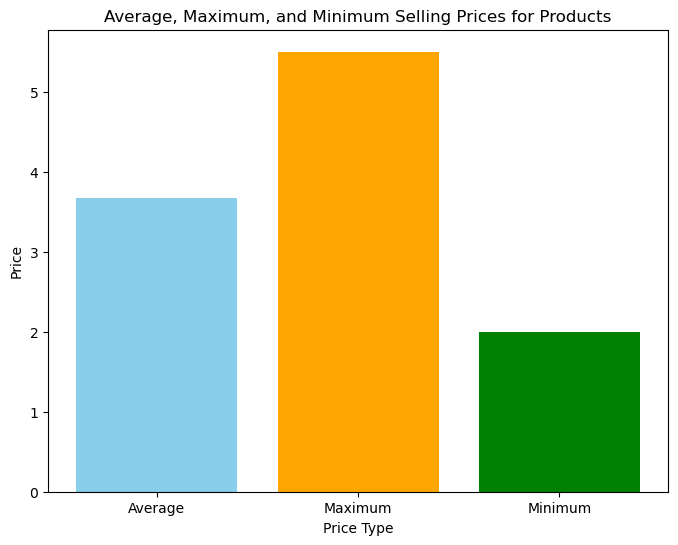

In [ ]:
import matplotlib.pyplot as plt

# Calculate the statistics
average_selling_price = product['selling_price'].mean()
max_selling_price = product['selling_price'].max()
min_selling_price = product['selling_price'].min()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_selling_price, max_selling_price, min_selling_price], color=['skyblue', 'orange', 'green'])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.show()


In [ ]:
# Grouping orders by product and summing the quantities
top_products = product.groupby('product_id')['product_name'].sum().reset_index()

# Sorting the products by quantity in descending order
top_products = top_products.sort_values(by='product_name', ascending=False)

# Taking the top 10 products
top_10_products = top_products.head(10)

# Displaying the top 10 products
print("Top 10 Orders Product-wise:")
print(top_10_products)


Top 10 Orders Product-wise:
   product_id                product_name
32       P033                      Yogurt
52       P053                     Waffles
27       P028             Veggie Sandwich
74       P075               Veggie Burger
70       P071             Vegetarian Wrap
66       P067  Turkey and Cheese Sandwich
24       P025             Turkey Sandwich
80       P081                 Turkey Club
67       P068               Tuna Sandwich
63       P064                       Toast


### **Top 10 Orders Product-wise**

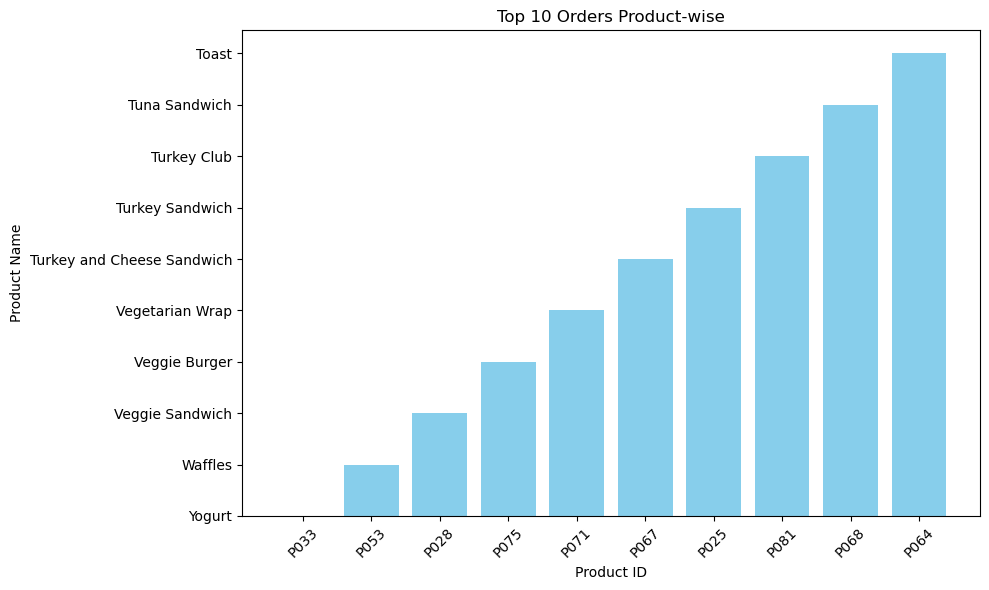

In [ ]:
import matplotlib.pyplot as plt

# Plotting the top 10 orders product-wise
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_id'], top_10_products['product_name'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Product Name')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Order Status Distribution**

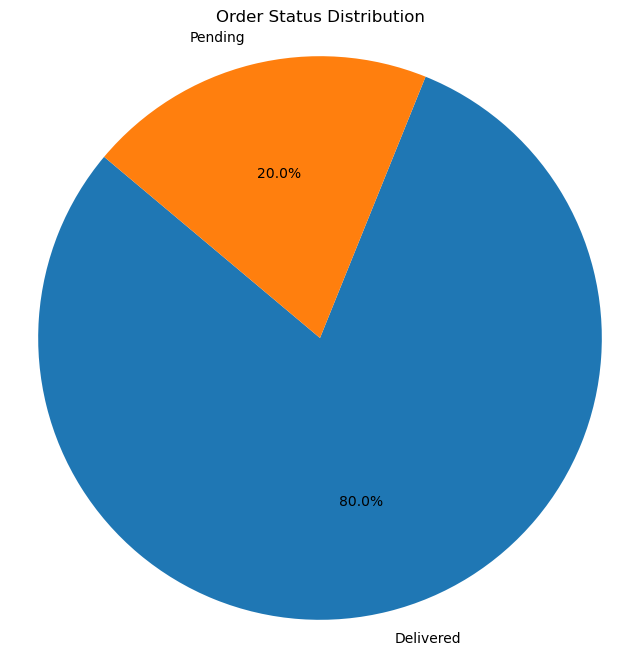

In [ ]:
# Counting the occurrences of each order status
order_status_distribution = order['order_status'].value_counts()

# Plotting the order status distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Status Distribution')
plt.axis('equal')
plt.show()


In [ ]:
# Calculate revenue for each product
product['revenue'] = product['stock'] * product['selling_price']

# Grouping products by category and summing the revenue
category_wise_revenue = product.groupby('category')['revenue'].sum().reset_index()

# Calculating the total revenue across all categories
total_revenue = category_wise_revenue['revenue'].sum()

# Calculate revenue percentage for each category
category_wise_revenue['revenue_percentage'] = (category_wise_revenue['revenue'] / total_revenue) * 100

# Display the result
print("Total Revenue Product Category Wise Percentage:")
print(category_wise_revenue)



Total Revenue Product Category Wise Percentage:
    category  revenue  revenue_percentage
0  Beverages   2123.5           26.367418
1       Food   5930.0           73.632582


### **Total Revenue Product Category Wise Percentage**

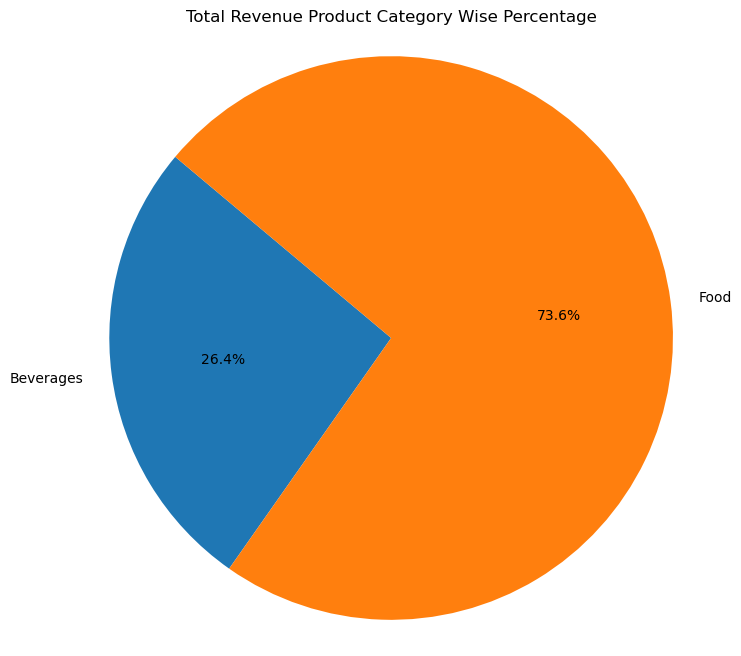

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
labels = category_wise_revenue['category']
sizes = category_wise_revenue['revenue_percentage']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue Product Category Wise Percentage')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()


In [ ]:
# Calculate revenue for each order
order['revenue'] = order['quantity'] * order['total_price']

# Calculate total revenue generated from all orders
total_revenue_all_orders = order['revenue'].sum()
print("Total Revenue Generated from All Orders:", total_revenue_all_orders)


Total Revenue Generated from All Orders: 1049.0


### **Average Salary by Position**

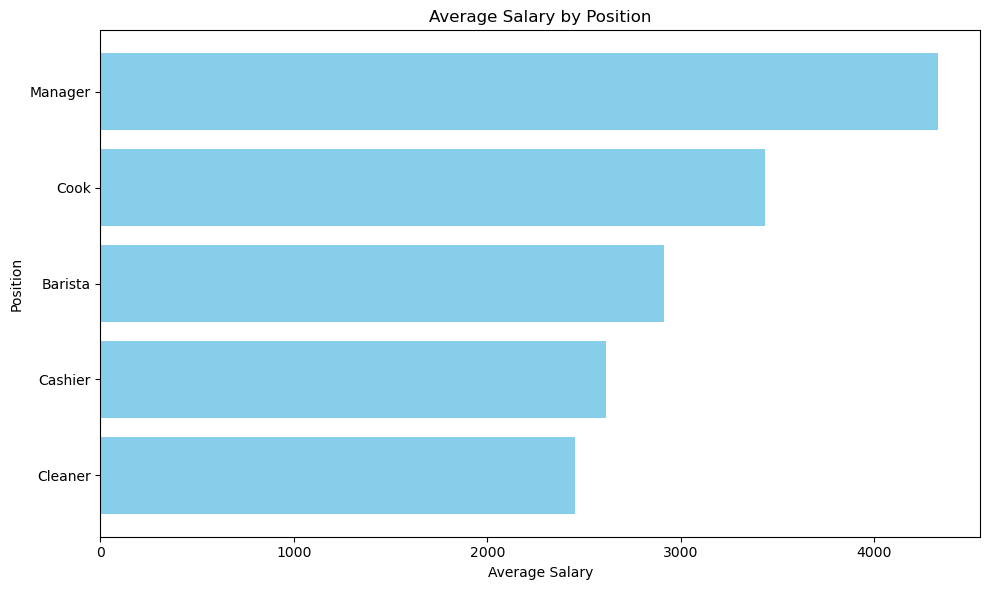

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'employee' containing employee details
# Grouping employees by position and calculating the average salary for each position
average_salary_by_position = employee.groupby('position')['salary'].mean().reset_index()

# Sorting positions by average salary in descending order
average_salary_by_position = average_salary_by_position.sort_values(by='salary', ascending=False)

# Plotting the average salary by position
plt.figure(figsize=(10, 6))
plt.barh(average_salary_by_position['position'], average_salary_by_position['salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Position')
plt.title('Average Salary by Position')
plt.gca().invert_yaxis()  # Invert y-axis to display the position with highest salary on top
plt.tight_layout()
plt.show()


In [ ]:
# Grouping orders by product and summing the quantities
product_order_quantities = order.groupby('product_id')['quantity'].sum().reset_index()

# Sorting products by total order quantity in descending order
product_order_quantities_sorted = product_order_quantities.sort_values(by='quantity', ascending=False)

# Extracting the product with the highest order quantity
product_highest_quantity = product_order_quantities_sorted.iloc[0]  # Assuming the first row has the highest quantity
highest_quantity_product_id = product_highest_quantity['product_id']
highest_quantity = product_highest_quantity['quantity']

# Extracting the product with the lowest order quantity
product_lowest_quantity = product_order_quantities_sorted.iloc[-1]  # Assuming the last row has the lowest quantity
lowest_quantity_product_id = product_lowest_quantity['product_id']
lowest_quantity = product_lowest_quantity['quantity']

# Retrieving the product names corresponding to the highest and lowest order quantities
highest_quantity_product_name = product.loc[product['product_id'] == highest_quantity_product_id, 'product_name'].iloc[0]
lowest_quantity_product_name = product.loc[product['product_id'] == lowest_quantity_product_id, 'product_name'].iloc[0]

# Displaying the results
print("Product with the Highest Order Quantity:")
print(f"Product Name: {highest_quantity_product_name}, Quantity: {highest_quantity}")

print("\nProduct with the Lowest Order Quantity:")
print(f"Product Name: {lowest_quantity_product_name}, Quantity: {lowest_quantity}")


Product with the Highest Order Quantity:
Product Name: Protein Smoothie, Quantity: 3.0

Product with the Lowest Order Quantity:
Product Name: Turkey and Cheese Sandwich, Quantity: 1.0


### **Most Preferred Payment Modes**

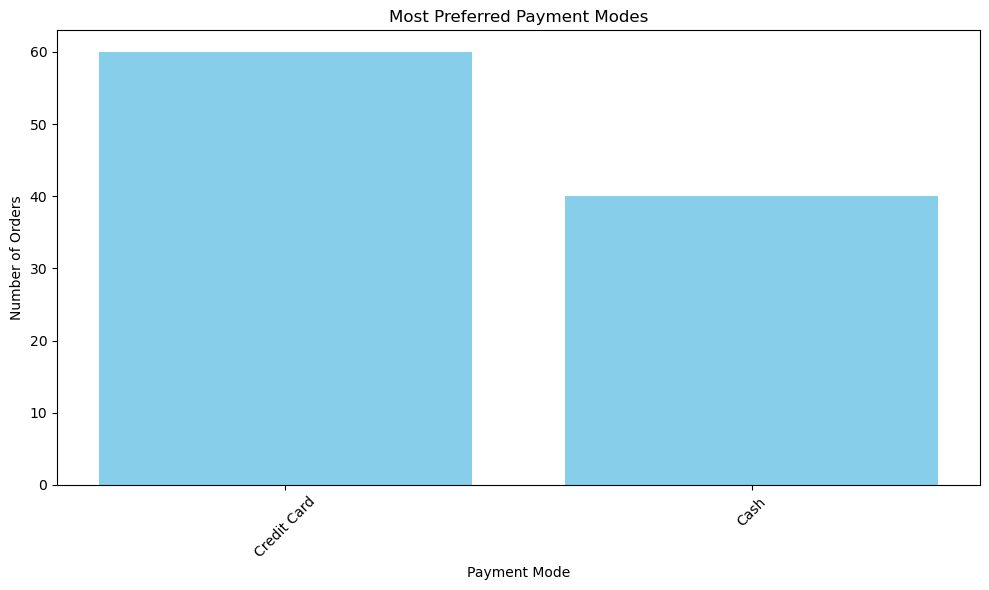

In [ ]:
import matplotlib.pyplot as plt

# Grouping orders by payment mode and counting the number of orders for each mode
payment_mode_counts = order['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['Payment Mode', 'Order Count']

# Sorting payment modes by order count in descending order
payment_mode_counts = payment_mode_counts.sort_values(by='Order Count', ascending=False)

# Plotting the most preferred payment modes
plt.figure(figsize=(10, 6))
plt.bar(payment_mode_counts['Payment Mode'], payment_mode_counts['Order Count'], color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Month-wise Total Sales**

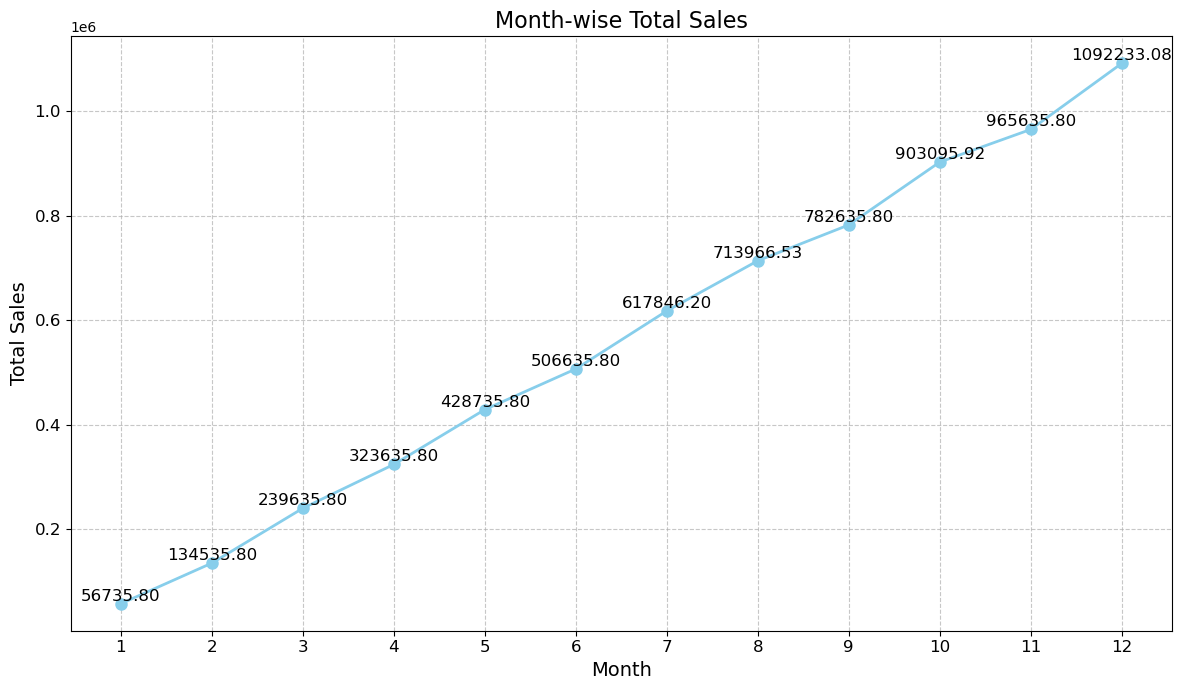

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace with your actual DataFrame: order
data = {
    'order_date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'total_price': [round(x, 2) for x in (100 + 50 * np.sin(np.arange(365) * 2 * np.pi / 30)).cumsum()]
}
order = pd.DataFrame(data)

# Convert order_date to datetime if it's not already in datetime format
order['order_date'] = pd.to_datetime(order['order_date'])

# Extract the month from the order date
order['month'] = order['order_date'].dt.month

# Group the orders by month and calculate total sales for each month
monthly_sales = order.groupby('month')['total_price'].sum().reset_index()

# Plotting month-wise total sales
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales['month'], monthly_sales['total_price'], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

# Adding titles and labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Month-wise Total Sales', fontsize=16)

# Customizing x-axis ticks
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding data labels to the points
for i, row in monthly_sales.iterrows():
    plt.text(row['month'], row['total_price'], f'{row["total_price"]:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### **Month and Year-wise Total Sales**

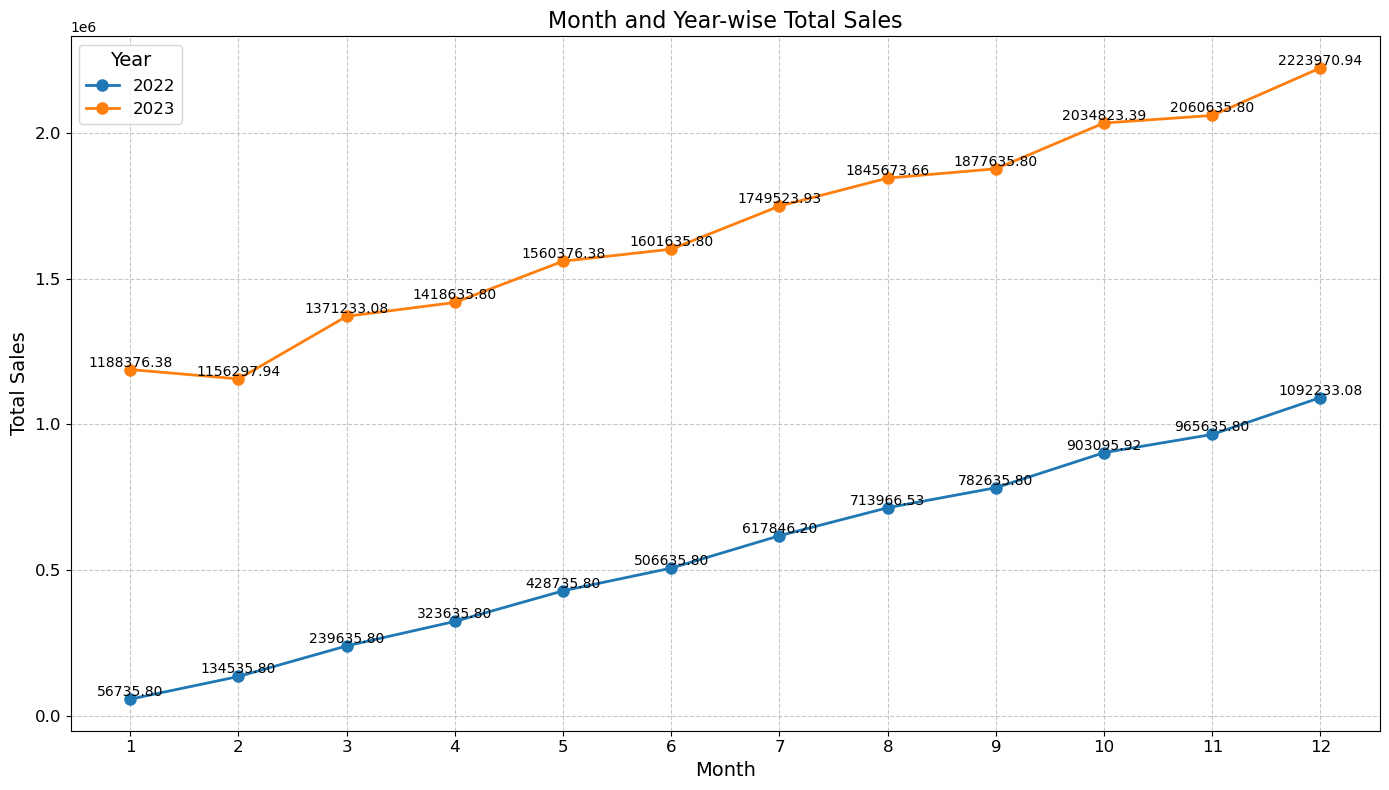

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace with your actual DataFrame: order
data = {
    'order_date': pd.date_range(start='2022-01-01', periods=730, freq='D'),
    'total_price': [round(x, 2) for x in (100 + 50 * np.sin(np.arange(730) * 2 * np.pi / 30)).cumsum()]
}
order = pd.DataFrame(data)

# Convert order_date to datetime if it's not already in datetime format
order['order_date'] = pd.to_datetime(order['order_date'])

# Extract the month and year from the order date
order['month'] = order['order_date'].dt.month
order['year'] = order['order_date'].dt.year

# Group the orders by month and year and calculate total sales for each month-year combination
monthly_sales = order.groupby(['year', 'month'])['total_price'].sum().reset_index()

# Plotting month and year-wise total sales
plt.figure(figsize=(14, 8))
for year in monthly_sales['year'].unique():
    sales_year = monthly_sales[monthly_sales['year'] == year]
    plt.plot(sales_year['month'], sales_year['total_price'], marker='o', linestyle='-', linewidth=2, markersize=8, label=year)

# Adding titles and labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Month and Year-wise Total Sales', fontsize=16)

# Customizing x-axis ticks
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding data labels to the points
for year in monthly_sales['year'].unique():
    sales_year = monthly_sales[monthly_sales['year'] == year]
    for i, row in sales_year.iterrows():
        plt.text(row['month'], row['total_price'], f'{row["total_price"]:.2f}', ha='center', va='bottom', fontsize=10)

# Enhancing the legend
plt.legend(title='Year', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


# conclusion

 This coffee shop management system provides a robust framework for analyzing and optimizing various aspects of a coffee shop's operations. By leveraging data on customers, products, orders, suppliers, and employees, the system offers valuable insights that can inform strategic decision-making and drive business growth.

Overall, this coffee shop management system serves as a valuable tool for coffee shop owners and managers, providing actionable insights and recommendations to enhance operational efficiency, improve customer satisfaction, and drive business success.